In [1]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize

In [2]:
import os
import sys
import random
import math
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
class LoculesConfig(Config):
    NAME = "locules"
    BACKBONE = "resnet50"
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 2 + 1
    STEPS_PER_EPOCH = 100
    DETECTION_MIN_CONFIDENCE = 0.9
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 640
    IMAGE_MAX_DIM = 640
    
    LEARNING_RATE = 0.001
    LEARNING_MOMENTUM = 0.9
    WEIGHT_DECAY = 0.0001

config = LoculesConfig()
config.display()
    


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        35
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [ ]:
import numpy as np
from utils.custom_dataset import DurianLoculeDataset

dataset_train = DurianLoculeDataset()
dataset_train.load_data('./dataset/dataset/locule-4/train/_annotations.coco.json', './dataset/dataset/locule-4/train/')
dataset_train.prepare()

dataset_val = DurianLoculeDataset()
dataset_val.load_data('./dataset/dataset/locule-4/valid/_annotations.coco.json', './dataset/dataset/locule-4/valid/')
dataset_val.prepare()

dataset = dataset_train
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    
dataset = dataset_val
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [4]:
import os
ROOT_DIR = os.path.abspath("./")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
print(COCO_MODEL_PATH)
print(MODEL_DIR)

/app/mask_rcnn_coco.h5
/app/logs


In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config, model_dir=MODEL_DIR)

# Train from coco checkpoint
model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')

Test/visualizing the model

In [ ]:
# Inspect the model in training or inference modes values: 'inference' or 'training'
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
  """Return a Matplotlib Axes array to be used in all visualizations in the notebook.  Provide a central point to control graph sizes. Adjust the size attribute to control how big to render images"""
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax

# Load validation dataset
# Must call before using the dataset
CUSTOM_DIR = f"{ROOT_DIR}/dataset/dataset/locule-4"
print(CUSTOM_DIR)
dataset_test = DurianLoculeDataset()
dataset_test.load_data('./dataset/dataset/locule-4/train/_annotations.coco.json', './dataset/dataset/locule-4/train/')
dataset_test.prepare()


In [ ]:
test_config = LoculesConfig()
# model = modellib.MaskRCNN(mode="inference", config=config, model_dir="./logs/locules20241028T2112/mask_rcnn_locules_0003.h5")
test_model = modellib.MaskRCNN(mode="inference", config=test_config, model_dir=MODEL_DIR)

WEIGHTS_PATH = "./logs/locules20241028T2112/mask_rcnn_locules_0003.h5"

In [ ]:
print("Loading weights ", WEIGHTS_PATH)
test_model.load_weights(WEIGHTS_PATH, by_name=True)

In [ ]:
#RUN DETECTION
image_id = random.choice(dataset_test.image_ids)
#image_id = 'D:/MaskRCNN-aar/Dataset/val/1.jfif'
print("image id is :",image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
modellib.load_image_gt(dataset_test, test_config, image_id)
info = dataset_test.image_info[image_id]
# print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,dataset.image_reference(image_id)))

# Run object detection
results = test_model.detect([image], verbose=1)

In [ ]:
import matplotlib.image as mpimg
# # Display results
# x = get_ax(1)
# r = results[0]
# ax = plt.gca()
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset_test.class_names, r['scores'], figAx=ax, title="Predictions")
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

# IMAGE="./dataset/dataset/locule-4/train/27-09-2023_DSLR_CLASS2-MIDRIPE_5D-13_05_03_JPG.rf.71de4574f5397e2cc69c038e51cc0774.jpg"

# # This is for predicting images which are not present in dataset
# path_to_new_image = IMAGE # Change this
# image1 = mpimg.imread(path_to_new_image)

# # Run object detection
# print(len([image1]))
# results1 = model.detect([image1], verbose=1)

# # Display results
# ax = get_ax(1)
# r1 = results1[0]
# visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
# dataset_test.class_names, r1['scores'], figAx=ax, title="Predictions1")

# Display results
x = get_ax(1)
r = results[0]

# Create figure and axis for passing as figAx
fig, ax = plt.subplots(1)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset_test.class_names, r['scores'], figAx=(fig, ax), title="Predictions")

# Logging
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

IMAGE = "./dataset/dataset/locule-4/test/IMG_20240123_084847_jpg.rf.5fbf49557f5941f461eb188da4dae510.jpg"

# This is for predicting images not present in the dataset
path_to_new_image = IMAGE  # Change this if needed
image1 = mpimg.imread(path_to_new_image)

# Run object detection
print(len([image1]))
results1 = test_model.detect([image1], verbose=1)

# Display results for the new image
fig, ax = plt.subplots(1)  # Create new figure and axis
r1 = results1[0]
visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
                            dataset_test.class_names, r1['scores'], figAx=(fig, ax), title="Predictions1")


## Performance Metrics:

- mAP@0.5
- mAP@0.75
- mAP@0.5-0.95
- mIoU

In [5]:
import os
import re

mask_rcnn_pattern = r'^mask_rcnn.*\.h5$'
home_dir = os.getcwd()

# Get the first item in the MODEL_DIR
latest_log_dir = os.listdir(MODEL_DIR)[1]  # Change to 0
directory_content = os.listdir(os.path.join(MODEL_DIR, latest_log_dir))

# Search for files matching the mask_rcnn pattern
matching_files = [f for f in directory_content if re.search(mask_rcnn_pattern, f)]

# Check if there are any matching files
if matching_files:
    latest_weight = matching_files[-1]
    print("Latest matching file:", latest_weight)

    # Construct the full path to the latest weight file
    latest_weight_dir = os.path.join(MODEL_DIR, latest_log_dir, latest_weight)
    print("Latest weight file path:", latest_weight_dir)
else:
    print("No matching files found.")


Latest matching file: mask_rcnn_locules_0003.h5
Latest weight file path: /app/logs/locules20241028T2112/mask_rcnn_locules_0003.h5


In [6]:
from mrcnn.utils import compute_ap, compute_ap_range

from utils.custom_dataset import DurianLoculeDataset

TEST_DATASET_JSON = "./dataset/dataset/locule-4/test/_annotations.coco.json"
TEST_DATASET_DIR = "./dataset/dataset/locule-4/test/"
TRAINED_MODEL_WEIGHTS_PATH = latest_weight_dir

dataset_test = DurianLoculeDataset()
dataset_test.load_data(TEST_DATASET_JSON, TEST_DATASET_DIR)
dataset_test.prepare()

test_config = LoculesConfig()
test_model = modellib.MaskRCNN(mode="inference", config=test_config, model_dir=MODEL_DIR)
test_model.load_weights(TRAINED_MODEL_WEIGHTS_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Re-starting from epoch 3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


mAP @ IoU=50: 1.0
mAP @ IoU=75: 1.0
Mean mAP: 0.846266667937239
Mean IoU: 0.9078176347498905


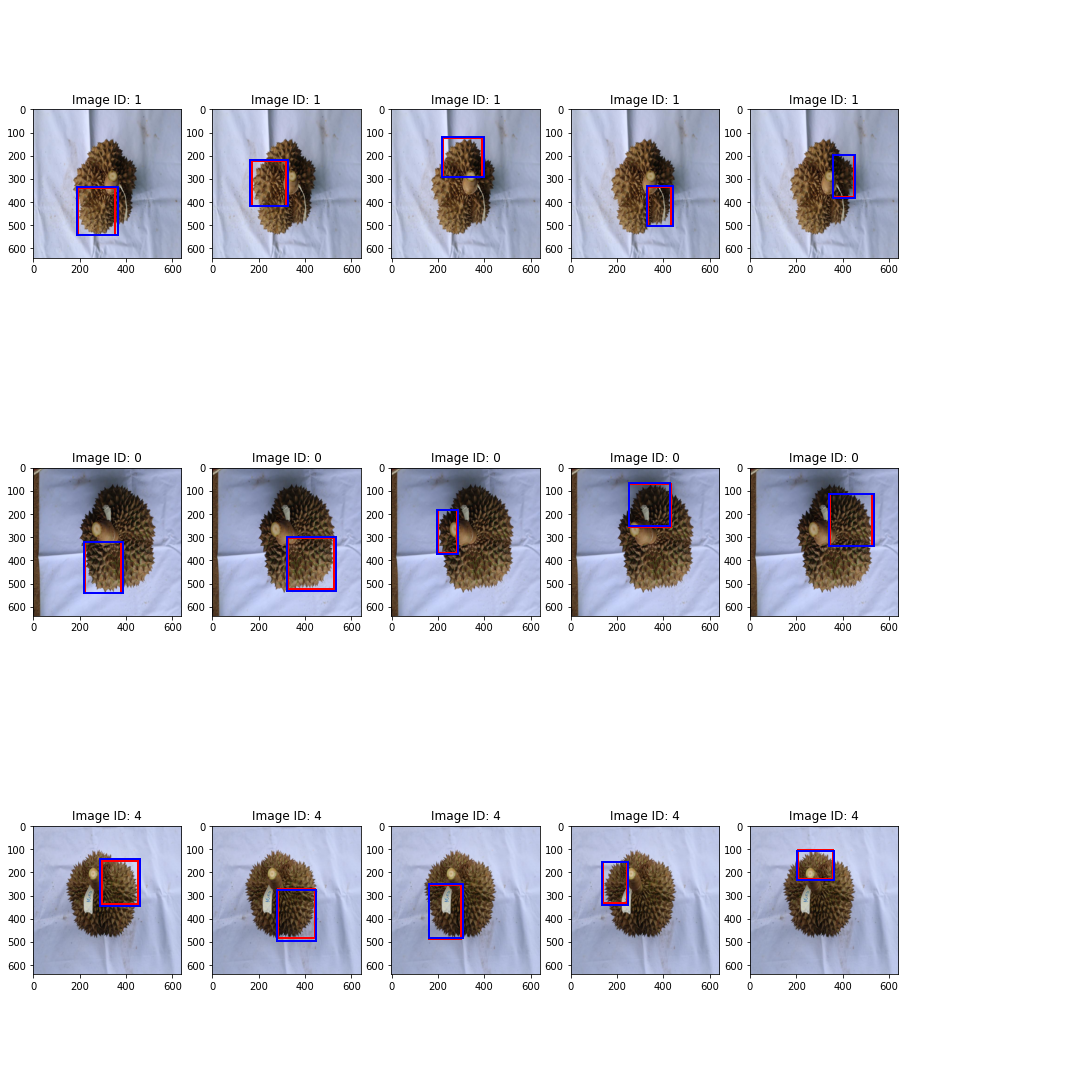

In [7]:
from utils.performance_metric import compute_performance_metrics, display_bounding_boxes

# Usage
image_ids = dataset_test.image_ids
metrics = compute_performance_metrics(image_ids=image_ids, test_model=test_model, dataset_test=dataset_test, test_config=test_config)

print("mAP @ IoU=50:", metrics["AP_50"])
print("mAP @ IoU=75:", metrics["AP_75"])
print("Mean mAP:", metrics["mAP"])
print("Mean IoU:", metrics["IOUs"])

# Display bounding boxes
display_bounding_boxes(metrics["image_data"])
